### TEST for 2 Atoms -> influence of angle to V and $\Gamma$

In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from matplotlib.animation import FuncAnimation
import os

In [2]:
# Matplotlib Einstellungen gemäß den LaTeX-Caption-Formatierungen
# Matplotlib Einstellungen gemäß den LaTeX-Caption-Formatierungen
plt.rcParams.update({
    'text.usetex': True,              # Enable LaTeX for text rendering
    'font.family': 'serif',           # Use a serif font family
    'font.serif': 'Palatino',         # Set Palatino as the serif font
    'text.latex.preamble': r'\usepackage{amsmath}',
    'font.size': 20,                   # Font size for general text
    'axes.titlesize': 20,              # Font size for axis titles
    'axes.labelsize': 20,              # Font size for axis labels
    'xtick.labelsize': 20,             # Font size for x-axis tick labels
    'ytick.labelsize': 20,             # Font size for y-axis tick labels
    'legend.fontsize': 20,             # Font size for legends
    'figure.figsize': [8, 6],          # Size of the plot (width x height)
    'figure.autolayout': True,         # Automatic layout adjustment
    'savefig.format': 'svg',           # Default format for saving figures
    'figure.facecolor': 'none',        # Make the figure face color transparent
    'axes.facecolor': 'none',          # Make the axes face color transparent
    'savefig.transparent': True        # Save figures with transparent background
})

output_dir = r"C:\Users\leopo\OneDrive - UT Cloud\Uni\Semester_8\BA_mit_Git\BA_Latex\Figures_From_Python"
os.makedirs(output_dir, exist_ok=True)

In [3]:
########################################                 Define constants                   #############################################
N = 2
fixed_lam   = 1
k_a = 2 * np.pi / fixed_lam
fixed_gamma = 1

fixed_dist  = 0.235 * fixed_lam
fixed_phi   = np.pi/2

x_0      = 0.02
x_max    = 1.4
x_size = 200

phi_0    = 0
phi_max  = np.pi / 2
phi_size = 4

t_max    = 40
t_size   = 100
########################################################################################################################    
times  = np.linspace(0, t_max, t_size) * fixed_gamma
dists  = np.linspace(x_0, x_max, x_size) * fixed_lam
phis   = np.linspace(phi_0, phi_max, phi_size)

In [4]:
########################################               define the geometry                 #############################################
def dipole_vector(phi = fixed_phi):
    """Returns the dipole vector given its orientation by angle phi."""
    dipole = np.array([np.cos(phi), np.sin(phi), 0])
    return dipole

def chain_positions(distance = fixed_dist, N = N):
    Pos = np.zeros((N, 3))
    for i in range(N):
        Pos[i,0] = i * distance
    return Pos

########################################             create the Hamiltonean                 #################################################
def Green_tensor(r_a, r_b, k_a):
    r_ab = r_b - r_a
    abs_r_ab = np.linalg.norm(r_ab)
    kappa = k_a * abs_r_ab
    return (np.exp(1j * kappa) / (4 * np.pi * kappa ** 2 * abs_r_ab)
                    * ((kappa ** 2 + 1j * kappa - 1) * np.eye(3)
                       + (- kappa ** 2 - 3 * 1j * kappa + 3)
                       * np.outer(r_ab, r_ab) / (abs_r_ab ** 2)))

def Gamma_matrix(distance, dipoles, lam, gamma):
    positions = chain_positions(distance)
    G_matrix = np.zeros((N, N), dtype=complex)
    for a in range(N):
        for b in range(N):
            G_matrix[a, b] = gamma
            r_a, r_b = positions[a], positions[b]
            if np.linalg.norm(r_b - r_a) > 1e-5:
                d_a, d_b = dipoles[a], dipoles[b]
                k_a = 2 * np.pi / lam
                result = (6 * np.pi * gamma / k_a * np.matmul(np.conj(d_a), np.matmul(Green_tensor(r_a, r_b, k_a), d_b.T)))
                G_matrix[a, b] = np.imag(result)
    return G_matrix

def V_matrix(distance, dipoles, lam, gamma):
    positions = chain_positions(distance, N)
    V_matrix = np.zeros((N, N), dtype=complex)
    for a in range(N):
        for b in range(N):
            r_a, r_b = positions[a], positions[b]
            V_matrix[a, b] = 0
            if np.linalg.norm(r_b - r_a) > 1e-5:
                d_a, d_b = dipoles[a], dipoles[b]
                k_a = 2 * np.pi / lam
                result = (3 * np.pi * gamma / k_a * np.matmul(np.conj(d_a), np.matmul(Green_tensor(r_a, r_b, k_a), d_b.T)))
                V_matrix[a, b] = np.real(result)
    return V_matrix
    
def H_eff(distance = fixed_dist, dipoles = [dipole_vector() for _ in range(N)], lam=fixed_lam, gamma=fixed_gamma):
    G = Gamma_matrix(distance, dipoles, lam, gamma)
    V = V_matrix(distance, dipoles, lam, gamma)
    return Qobj(V) - 1j / 2 * Qobj(G)

C:\Users\leopo\AppData\Local\Temp\ipykernel_13472\276417455.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  Gamma_vals_equal[i, j] = G_equal[0, 1]  # Store interaction of first two atoms
C:\Users\leopo\AppData\Local\Temp\ipykernel_13472\276417455.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  V_vals_equal[i, j] = V_equal[0, 1]  # Store interaction of first two atoms
C:\Users\leopo\AppData\Local\Temp\ipykernel_13472\276417455.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  Gamma_vals_fixed[i, j] = G_fixed[0, 1]  # Store interaction of first two atoms
C:\Users\leopo\AppData\Local\Temp\ipykernel_13472\276417455.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  V_vals_fixed[i, j] = V_fixed[0, 1]  # Store interaction of first two atoms


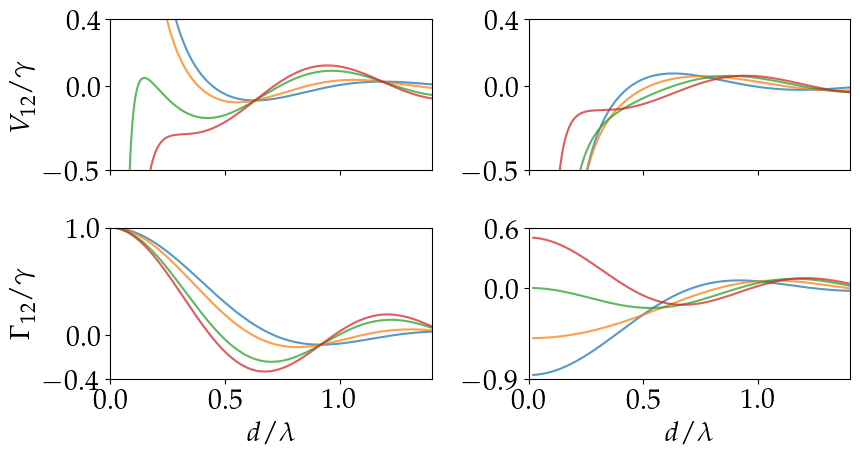

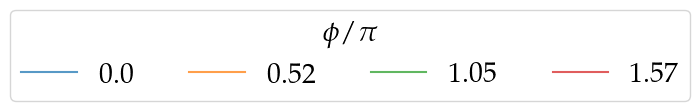

In [5]:
# Case for fixed phi = 5π/6
fixed_phi = 5 * np.pi / 6

# Initialize arrays to store values
Gamma_vals_equal = np.zeros((x_size, phi_size))
V_vals_equal = np.zeros((x_size, phi_size))
Gamma_vals_fixed = np.zeros((x_size, phi_size))
V_vals_fixed = np.zeros((x_size, phi_size))

# Compute for equal dipole angles
for i, dist in enumerate(dists):
    for j, phi in enumerate(phis):
        dipoles_equal = [dipole_vector(phi) for _ in range(N)]  # All dipoles vary equally
        G_equal = Gamma_matrix(dist, dipoles_equal, fixed_lam, fixed_gamma)
        V_equal = V_matrix(dist, dipoles_equal, fixed_lam, fixed_gamma)
        Gamma_vals_equal[i, j] = G_equal[0, 1]  # Store interaction of first two atoms
        V_vals_equal[i, j] = V_equal[0, 1]  # Store interaction of first two atoms

# Compute for fixed dipole angle (fixed at 5π/6)
for i, dist in enumerate(dists):
    for j, phi in enumerate(phis):
        dipoles_fixed = [dipole_vector(fixed_phi)] + [dipole_vector(phi) for _ in range(1, N)]  # First dipole fixed
        G_fixed = Gamma_matrix(dist, dipoles_fixed, fixed_lam, fixed_gamma)
        V_fixed = V_matrix(dist, dipoles_fixed, fixed_lam, fixed_gamma)
        Gamma_vals_fixed[i, j] = G_fixed[0, 1]  # Store interaction of first two atoms
        V_vals_fixed[i, j] = V_fixed[0, 1]  # Store interaction of first two atoms

# Create subplots: 2 rows, 2 columns
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(9, 5))
# Plotting for equal dipoles on the left side (first two plots)
for j in range(phi_size):
    ax1.plot(dists / fixed_lam, V_vals_equal[:, j] / fixed_gamma, label=f'${round(phis[j], 2)}$', alpha=0.75)
    ax2.plot(dists / fixed_lam, Gamma_vals_equal[:, j] / fixed_gamma, label=f'${round(phis[j], 2)}$', alpha=0.75)

# Plotting for fixed and varying dipoles on the right side (last two plots)
for j in range(phi_size):
    ax3.plot(dists / fixed_lam, V_vals_fixed[:, j] / fixed_gamma, label=f'${round(phis[j], 2)}$', alpha=0.75)
    ax4.plot(dists / fixed_lam, Gamma_vals_fixed[:, j] / fixed_gamma, label=f'${round(phis[j], 2)}$', alpha=0.75)

# Set axis labels and limits for the left-side plots (equal dipoles)
ax1.set_ylabel('$V_{12} / \gamma$')
ax2.set_ylabel('$\Gamma_{12} / \gamma$')
ax1.set_xlim([0, x_max])  # Limit y-axis
ax3.set_xlim([0, x_max])  # Limit y-axis
ax1.set_ylim([-.5, 0.4])  # Limit y-axis
ax1.set_yticks([-.5, 0, 0.4])  # Limit y-axis
ax3.set_ylim([-.5, 0.4])  # Limit y-axis
ax3.set_yticks([-.5, 0, 0.4])  # Limit y-axis
ax2.set_ylim([-.4, 1])  # Limit y-axis
ax2.set_yticks([-.4, 0, 1])  # Limit y-axis
ax4.set_ylim([-.9, .6])  # Limit y-axis
ax4.set_yticks([-.9, 0, .6])  # Limit y-axis
ax2.set_xlabel('$d/\\lambda$')
ax4.set_xlabel('$d/\\lambda$')

# Save and display the plots
figure_name = "2_atoms_Matrix_elems_combined(r).svg"
#plt.savefig(os.path.join(output_dir, figure_name))
plt.show()


# Create a separate legend figure
fig_legend = plt.figure(figsize=(6, 1))
handles, labels = ax3.get_legend_handles_labels()
fig_legend.legend(handles, labels, loc='center', title='$\\phi/\pi$', ncol=4)
plt.axis('off')
legend_filename = figure_name + "legend.svg"
#fig_legend.savefig(os.path.join(output_dir, legend_filename), bbox_inches='tight')
plt.show()

In [23]:
# Diagonalize the G_fixed matrix for a specific distance and phi
# Select the specific G_fixed matrix for the given distance and phi
G_matrix_to_diagonalize = Gamma_matrix(0.8, [dipole_vector(fixed_phi)] + [dipole_vector(4)], fixed_lam, fixed_gamma)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(G_matrix_to_diagonalize)

# Output eigenvalues and eigenvectors
print("Eigenvalues of G_fixed:")
print(eigenvalues)
print("Eigenvectors of G_fixed:")
print(eigenvectors)

Eigenvalues of G_fixed:
[1.06271443+0.j 0.93728557+0.j]
Eigenvectors of G_fixed:
[[ 0.70710678-0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]


In [47]:
# Fixed value for both dipoles
fixed_dipole_value = 1.032035851652854

# Initialize arrays to store values
Gamma_vals_fixed_both = np.zeros((x_size, phi_size))
V_vals_fixed_both = np.zeros((x_size, phi_size))

# Compute for both dipoles fixed at 0.0701254
for i, dist in enumerate(dists):
    for j, phi in enumerate(phis):
        # Both dipoles are set to the fixed value
        dipoles_fixed_both = [dipole_vector(fixed_dipole_value) for _ in range(N)]
        G_fixed_both = Gamma_matrix(dist, dipoles_fixed_both, fixed_lam, fixed_gamma)
        V_fixed_both = V_matrix(dist, dipoles_fixed_both, fixed_lam, fixed_gamma)
        Gamma_vals_fixed_both[i, j] = G_fixed_both[0, 1]  # Store interaction of first two atoms
        V_vals_fixed_both[i, j] = V_fixed_both[0, 1]  # Store interaction of first two atoms

# Create subplots: 2 rows, 3 columns to accommodate the new case
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting for both dipoles fixed at 0.0701254 (last two plots)
for j in range(phi_size):
    ax1.plot(dists / fixed_lam, V_vals_fixed_both[:, j] / fixed_gamma, label=f'${round(phis[j], 2)}$', alpha=0.75)
    ax2.plot(dists / fixed_lam, Gamma_vals_fixed_both[:, j] / fixed_gamma, label=f'${round(phis[j], 2)}$', alpha=0.75)

# Set axis labels and limits for the plots
ax1.set_ylabel('$V_{12} / \gamma$')
ax2.set_ylabel('$\Gamma_{12} / \gamma$')
ax2.set_xlim([0.05, 0.4])  # Limit y-axis
ax1.set_ylim([-.9, 0.1])  # Limit y-axis

# Save and display the plots
figure_name = "2_atoms_Matrix_elems_combined_fixed.svg"
#plt.savefig(os.path.join(output_dir, figure_name))
plt.show()